In [103]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

from chitaxi.datasets import loader, builder

# %config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2
plt.style.use('seaborn')
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.facecolor'] = 'w'

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
loader.list_feathers()

2015_features.feather
2016_features.feather
Base_Xtest.feather
Base_Xtrain.feather
Base_Ytest.feather
Base_Ytrain.feather
clean_2013.feather
clean_2014.feather
clean_2015.feather
clean_2016.feather
labels_2016.feather
y_2015.feather
y_2016.feather


In [105]:
X_train = loader.read_feather("Base_Xtrain.feather").set_index("taxi_id")
X_test = loader.read_feather("Base_Xtest.feather").set_index("taxi_id")
y_train = loader.read_feather("Base_Ytrain.feather").set_index("taxi_id")
y_test = loader.read_feather("Base_Ytest.feather").set_index("taxi_id")

## UTILS

In [106]:
def wrap_results(model, X_train, X_test, y_train, y_test, metric):
    # model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train).flatten()
    y_test_predict = model.predict(X_test).flatten()
    y_train = y_train.values.flatten()
    y_test = y_test.values.flatten()
    res = [
        metric(y_train_predict, y_train),
        metric(y_test_predict, y_test),
        np.mean((np.abs(y_train_predict - y_train) / y_train)),
        np.mean((np.abs(y_test_predict - y_test) / y_test)),
        mean_absolute_error(y_train_predict, y_train) / y_train.mean(),
        mean_absolute_error(y_test_predict, y_test) / y_test.mean()
    ]
    return pd.Series(res, index=['Metric Train', 'Metric Test', 'Ratio Train', 'Ratio Test', 'Ratio 2 Train', 'Ratio 2 Test'])

## Linear Regression

In [107]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
linalg_results = wrap_results(lin_reg, X_train, X_test, y_train, y_test, mean_squared_error)
linalg_results

Metric Train     3.059113e+08
Metric Test      3.181183e+08
Ratio Train      2.920237e+01
Ratio Test       4.150217e+01
Ratio 2 Train    2.443837e-01
Ratio 2 Test     2.477194e-01
dtype: float64

## AdaBoost and Decision Tree

In [110]:
ada= joblib.load('AdaBoost_modelBest.sav') 

In [111]:
ada.fit(X_train, y_train)

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='square',
         n_estimators=40, random_state=10)

In [113]:
metric = mean_squared_error
ada_results = wrap_results(ada, X_train, X_test, y_train, y_test, metric)
ada_results

Metric Train     3.247237e+08
Metric Test      3.214946e+08
Ratio Train      2.760529e+01
Ratio Test       3.887922e+01
Ratio 2 Train    2.507870e-01
Ratio 2 Test     2.450874e-01
dtype: float64

In [115]:

dt = joblib.load('DecisionTree_modelBest.sav')
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [116]:
dt_results = wrap_results(dt, X_train, X_test, y_train, y_test, metric)
dt_results

Metric Train     2.959126e+08
Metric Test      3.252301e+08
Ratio Train      1.950726e+01
Ratio Test       3.184094e+01
Ratio 2 Train    2.359672e-01
Ratio 2 Test     2.408255e-01
dtype: float64

## GBT and RF

In [117]:
gb = joblib.load('GB_model-best.sav')
gb.fit(X_train, y_train)

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=17,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [118]:
gb_results = wrap_results(gb, X_train, X_test, y_train, y_test, metric)
gb_results

Metric Train     1.597166e+08
Metric Test      2.963458e+08
Ratio Train      2.122186e+01
Ratio Test       3.664171e+01
Ratio 2 Train    1.733803e-01
Ratio 2 Test     2.282004e-01
dtype: float64

In [119]:
rf = joblib.load('RF_model-best.sav')
rf.fit(X_train, y_train)

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\xuhui\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.19.1. This might lead to breaking co

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [120]:
rf_results = wrap_results(rf, X_train, X_test, y_train, y_test, metric)
rf_results

Metric Train     2.541239e+07
Metric Test      3.033262e+08
Ratio Train      8.957474e+00
Ratio Test       3.318748e+01
Ratio 2 Train    4.923039e-02
Ratio 2 Test     2.280996e-01
dtype: float64

## Final Results

In [121]:
final = pd.DataFrame({
    'LinReg': linalg_results,
    'Ada': ada_results,
    'DT': dt_results,
    'RF': rf_results,
    'GBT': gb_results
})

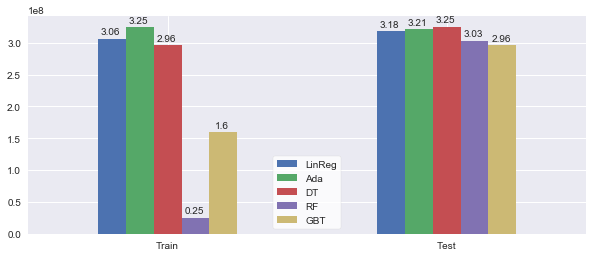

In [202]:
fig, ax = plt.subplots(figsize=(10,4))
final.iloc[:2,].plot(kind='bar', rot=0, ax=ax)
ax.set_xticklabels(['Train', 'Test'])

rects = ax.patches
i=0
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()+10000000
    x_value=rect.get_x()+0.045

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'top'

    # Use Y value as label and format number with one decimal place
    if i%2==1:
        #label = "{:.1f}".format(final.loc["Metric Train"][i]/10**8)
        label = round(final.loc["Metric Test"][int(i/2)]/10**8,2)
    else:
        #label = "{:.1f}".format(final.loc["Metric Test"][i-5]/10**8)
        label = round(final.loc["Metric Train"][int(i/2)]/10**8,2)

    i+=1

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.



fig.savefig("MSE.png", bbox_inches="tight", dpi=200)

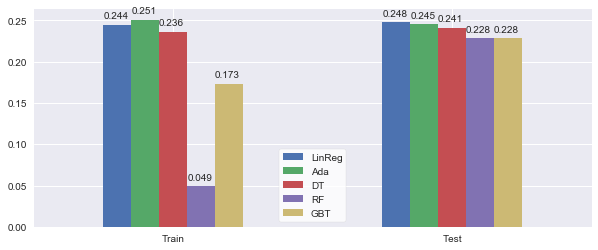

In [203]:
fig, ax = plt.subplots(figsize=(10,4))
final.iloc[4:,].plot(kind='bar', rot=0, ax=ax)
ax.set_xticklabels(['Train', 'Test'])

rects = ax.patches
i=0
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()+0.01
    x_value=rect.get_x()+0.045

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'top'

    # Use Y value as label and format number with one decimal place
    if i%2==1:
        #label = "{:.1f}".format(final.loc["Metric Train"][i]/10**8)
        label = round(final.loc["Ratio 2 Test"][int(i/2)],3)
    else:
        #label = "{:.1f}".format(final.loc["Metric Test"][i-5]/10**8)
        label = round(final.loc["Ratio 2 Train"][int(i/2)],3)

    i+=1

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


fig.savefig("accuracy.png", bbox_inches="tight", dpi=200)

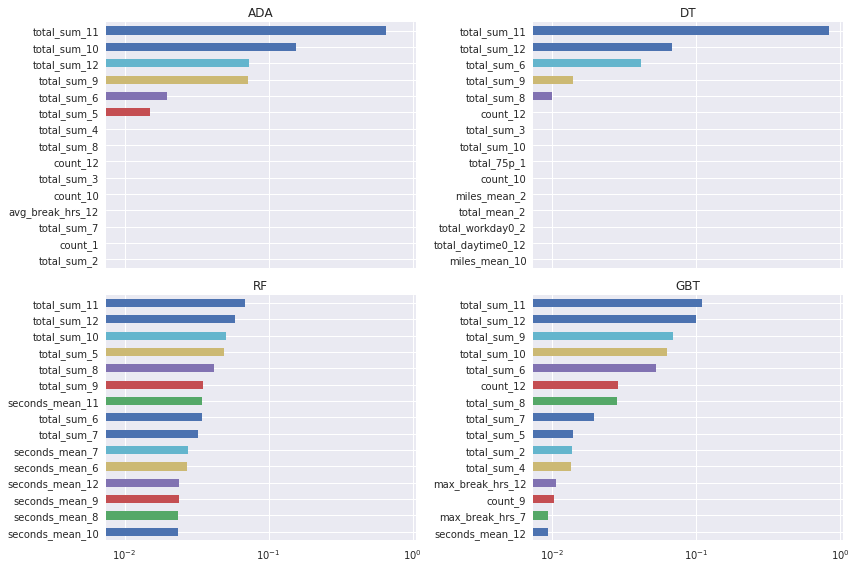

In [225]:
fig, ax = plt.subplots(2,2,figsize=(12,8),sharex=True)
ax = ax.flatten()

for model, name, i in zip([ada, dt, rf, gb], ['ADA', 'DT', 'RF', 'GBT'], range(4)):
    df = pd.DataFrame(model.feature_importances_, index=X_train.columns.tolist())
    df.columns = [name]
    df.iloc[:,0].sort_values(ascending=False)[:15][::-1].plot(kind='barh', ax=ax[i], logx=True)
    ax[i].set_title(name)

fig.tight_layout()
fig.savefig("feature_importance.png", dpi=300, bbox_inches='tight')

In [240]:
pred_train

array([73585.31035833, 42499.201525  , 81125.21309778, ...,
       71587.71678278,  3113.91765781, 58613.30701444])

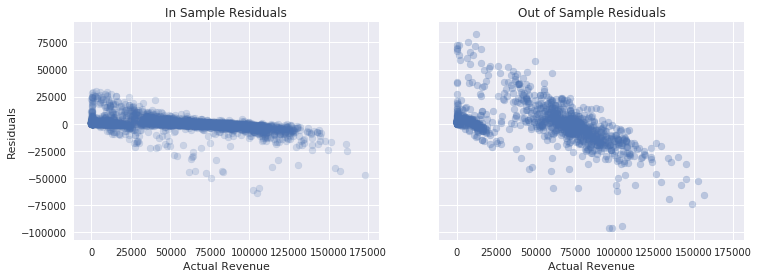

In [250]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)
e_in_sample = pred_train - y_train.values.flatten()
e_oos = pred_test -  y_test.values.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12,4),sharex=True, sharey=True)


ax[0].scatter(y_train.values, e_in_sample, alpha=0.2)
ax[0].set_title("In Sample Residuals")
ax[0].set_ylabel("Residuals")
ax[0].set_xlabel("Actual Revenue")
ax[1].scatter(y_test.values,e_oos,alpha=0.3)
ax[1].set_title("Out of Sample Residuals")
ax[1].set_xlabel("Actual Revenue")

fig.savefig("RF_res.png", dpi=200)

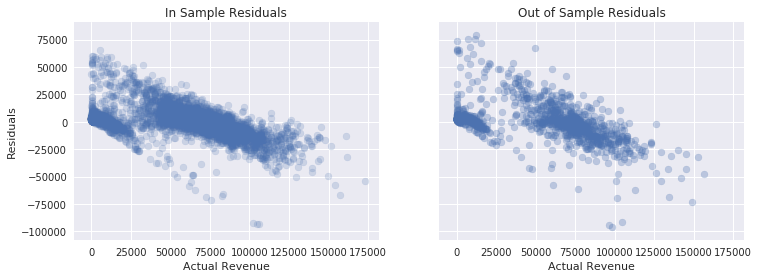

In [252]:
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)
e_in_sample = pred_train - y_train.values.flatten()
e_oos = pred_test -  y_test.values.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12,4),sharex=True, sharey=True)


ax[0].scatter(y_train.values, e_in_sample, alpha=0.2)
ax[0].set_title("In Sample Residuals")
ax[0].set_ylabel("Residuals")
ax[0].set_xlabel("Actual Revenue")
ax[1].scatter(y_test.values,e_oos,alpha=0.3)
ax[1].set_title("Out of Sample Residuals")
ax[1].set_xlabel("Actual Revenue")

fig.savefig("GB_res.png", dpi=200)